In [5]:
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd
import ssl


ssl._create_default_https_context = ssl._create_unverified_context
url = "https://en.wikipedia.org/wiki/List_of_U.S._states_by_median_home_price"
page = urllib.request.urlopen(url)
soup = BeautifulSoup(page, "lxml")
all_sortable_tables = soup.find_all('table', class_='wikitable sortable')
right_table = all_sortable_tables[0]
A=[]
B=[]
C=[]
right_table=soup.find_all('table',class_='wikitable sortable')
for row in right_table[0].findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==3:
        mlnk=cells[1].findAll('a')
        if mlnk[0].contents[0] != 'District of Columbia':
            A.append(cells[0].find(text=True).strip())
            B.append(mlnk[0].contents[0])
            C.append(cells[2].find(text=True).strip())
df=pd.DataFrame(A,columns=['State Rank'])
df['State or Teritory']=B
df['Median Home Price in US$']=C
df.to_csv('CSC221_webscrape_data.csv')
df.head(10)

,State Rank,State or Teritory,Median Home Price in US$
0,1,Hawaii,"$636,451"
1,2,California,"$554,886"
2,3,Massachusetts,"$422,856"
3,4,Washington,"$409,228"
4,5,Colorado,"$397,820"
5,6,Oregon,"$361,970"
6,7,Utah,"$348,376"
7,8,New Jersey,"$335,607"
8,9,New York,"$321,934"
9,10,Maryland,"$308,041"


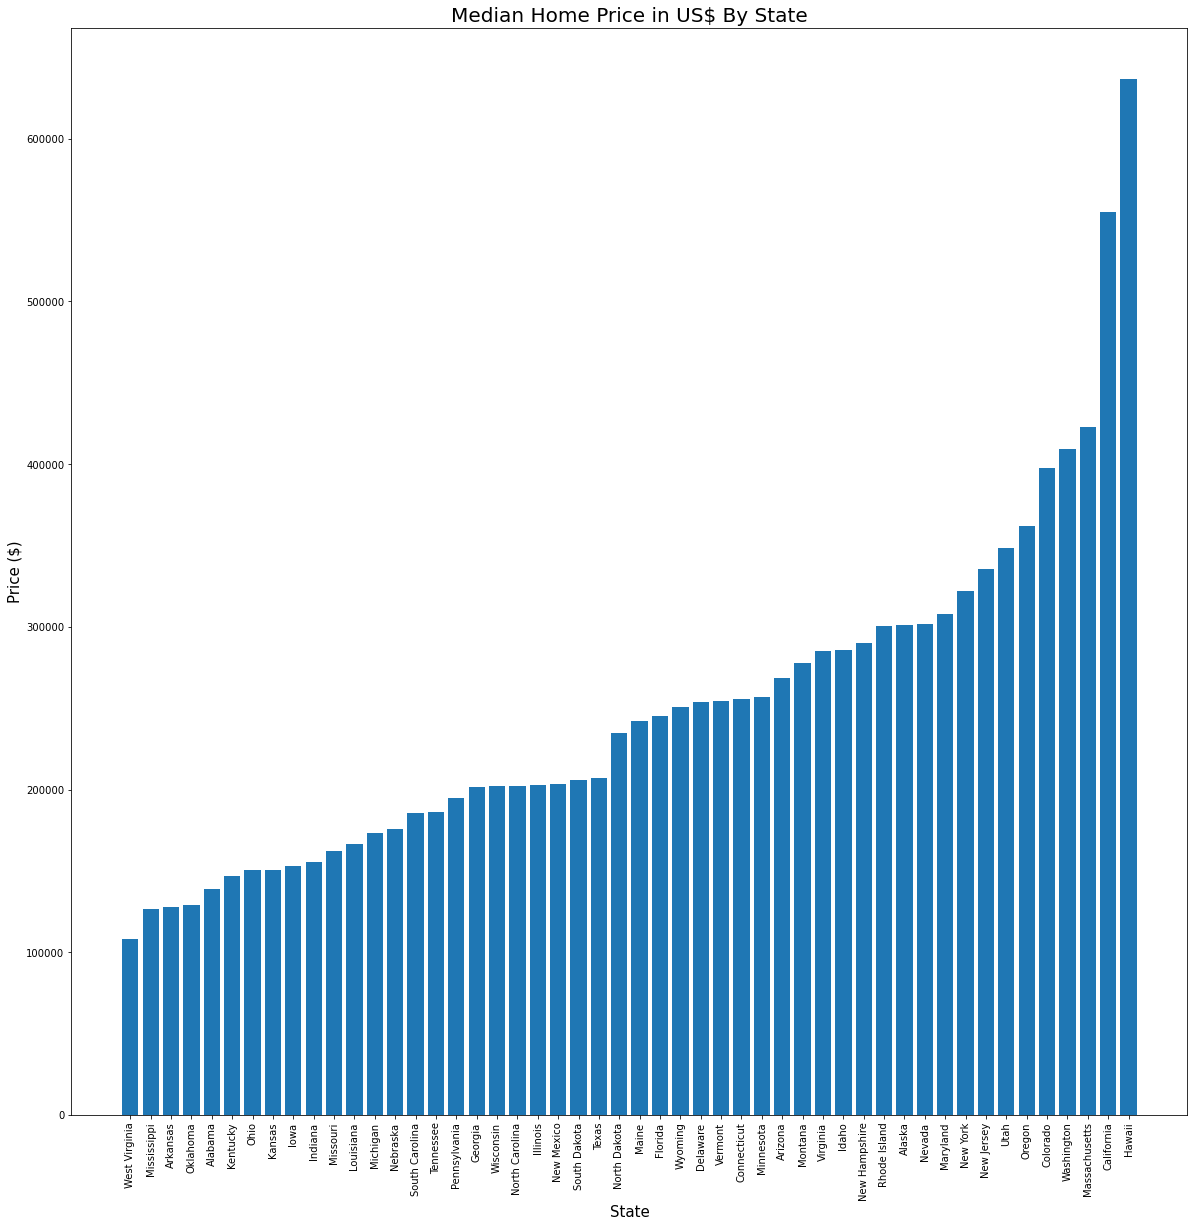

In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
raw_data = pd.read_csv('CSC221_webscrape_data.csv')
states = np.array(raw_data['State or Teritory'])
med_price = np.array(raw_data['Median Home Price in US$'])
states = np.flip(states)
med_price = np.flip(med_price)
med_price_fixed = []

for i in med_price:
    i = i.replace('$', '')
    med_price_fixed.append(i.split(','))
med_price = []
for i in med_price_fixed:
    sum = 0
    sum += int(i[0]) * 1000 + int(i[1])
    med_price.append(sum)


plt.figure(figsize=(20,20))
plt.bar(states, med_price)
plt.xticks(range(0, len(states)), states, rotation=90)
plt.title("Median Home Price in US$ By State", fontsize=20)
plt.xlabel("State", fontsize= 15)
plt.ylabel("Price ($)", fontsize = 15)
plt.show()